In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np
import numpy.random as rn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from pathlib import Path

# Helper functions
from helper_functions import get_images, prep_for_train

# Styles for miles
style.use('ggplot')

In [2]:
model_deepfake = keras.Sequential([
  layers.Conv2D(filters = 64, kernel_size = 4, strides = (1, 1), input_shape = (256, 256, 3), padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(filters = 32, kernel_size = 4, strides = (1, 1), padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(filters = 16, kernel_size = 4, strides = (1, 1), padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(units = 4096, activation = 'relu'),
  layers.Dropout(rate = 0.1),
  layers.Dense(units = 256, activation = 'relu'), 
  layers.Dense(units = 1)
])

In [10]:
model_deepfake.compile(optimizer = SGD(lr=0.001), 
                       metrics = [keras.metrics.BinaryAccuracy(), keras.metrics.Precision()],
                       loss = keras.losses.BinaryCrossentropy())

In [11]:
model_deepfake.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      3136      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      32800     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 16)        8208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

In [13]:
# TRAIN THAT MODEL!
X, y = prep_for_train(get_images(100, seed=800))
model_fit = model_deepfake.fit(X, y, epochs=10, batch_size=50, validation_data=prep_for_train(get_images(100, dtype='valid', seed=430)))

Epoch 1/10
2/2 [==============================] - 8s 6s/step - loss: 0.6470 - binary_accuracy: 0.6300 - precision_3: 0.8333 - val_loss: 0.7105 - val_binary_accuracy: 0.5400 - val_precision_3: 0.8000
Epoch 2/10
2/2 [==============================] - 10s 6s/step - loss: 0.6610 - binary_accuracy: 0.6000 - precision_3: 0.6000 - val_loss: 0.7065 - val_binary_accuracy: 0.5200 - val_precision_3: 0.5714
Epoch 3/10
2/2 [==============================] - 11s 7s/step - loss: 0.6556 - binary_accuracy: 0.6100 - precision_3: 0.6250 - val_loss: 0.7096 - val_binary_accuracy: 0.5300 - val_precision_3: 0.6667
Epoch 4/10
2/2 [==============================] - 12s 7s/step - loss: 0.6367 - binary_accuracy: 0.6300 - precision_3: 0.7500 - val_loss: 0.7095 - val_binary_accuracy: 0.5200 - val_precision_3: 0.6000
Epoch 5/10
2/2 [==============================] - 10s 6s/step - loss: 0.6371 - binary_accuracy: 0.6600 - precision_3: 0.8889 - val_loss: 0.7115 - val_binary_accuracy: 0.5300 - val_precision_3: 1.0000
E

In [15]:
model_fit.history

{'loss': [0.6469698548316956,
  0.6609832048416138,
  0.6556088924407959,
  0.6366841197013855,
  0.6371052265167236,
  0.6351257562637329,
  0.6351353526115417,
  0.6296395063400269,
  0.6266895532608032,
  0.6200997829437256],
 'binary_accuracy': [0.6299999952316284,
  0.6000000238418579,
  0.6100000143051147,
  0.6299999952316284,
  0.6600000262260437,
  0.6399999856948853,
  0.6800000071525574,
  0.6499999761581421,
  0.6499999761581421,
  0.6700000166893005],
 'precision_3': [0.8333333134651184,
  0.6000000238418579,
  0.625,
  0.75,
  0.8888888955116272,
  1.0,
  0.9090909361839294,
  0.875,
  0.875,
  0.8333333134651184],
 'val_loss': [0.710487961769104,
  0.7065361142158508,
  0.7096171379089355,
  0.7095092535018921,
  0.7115306258201599,
  0.708304762840271,
  0.708536684513092,
  0.7074103355407715,
  0.7063081860542297,
  0.7114607095718384],
 'val_binary_accuracy': [0.5400000214576721,
  0.5199999809265137,
  0.5299999713897705,
  0.5199999809265137,
  0.5299999713897705,


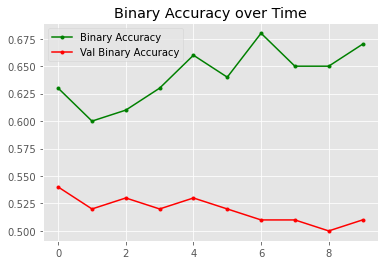

In [16]:
plt.plot(model_fit.history['binary_accuracy'], 'g.-', label = 'Binary Accuracy')
plt.plot(model_fit.history['val_binary_accuracy'], 'r.-', label = 'Val Binary Accuracy')
plt.legend()
plt.title('Binary Accuracy over Time')
plt.show()